<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing_data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_data['HousePrice'] = housing.target

In [ ]:
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Check if ther's any missing value

housing_data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
HousePrice,0


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


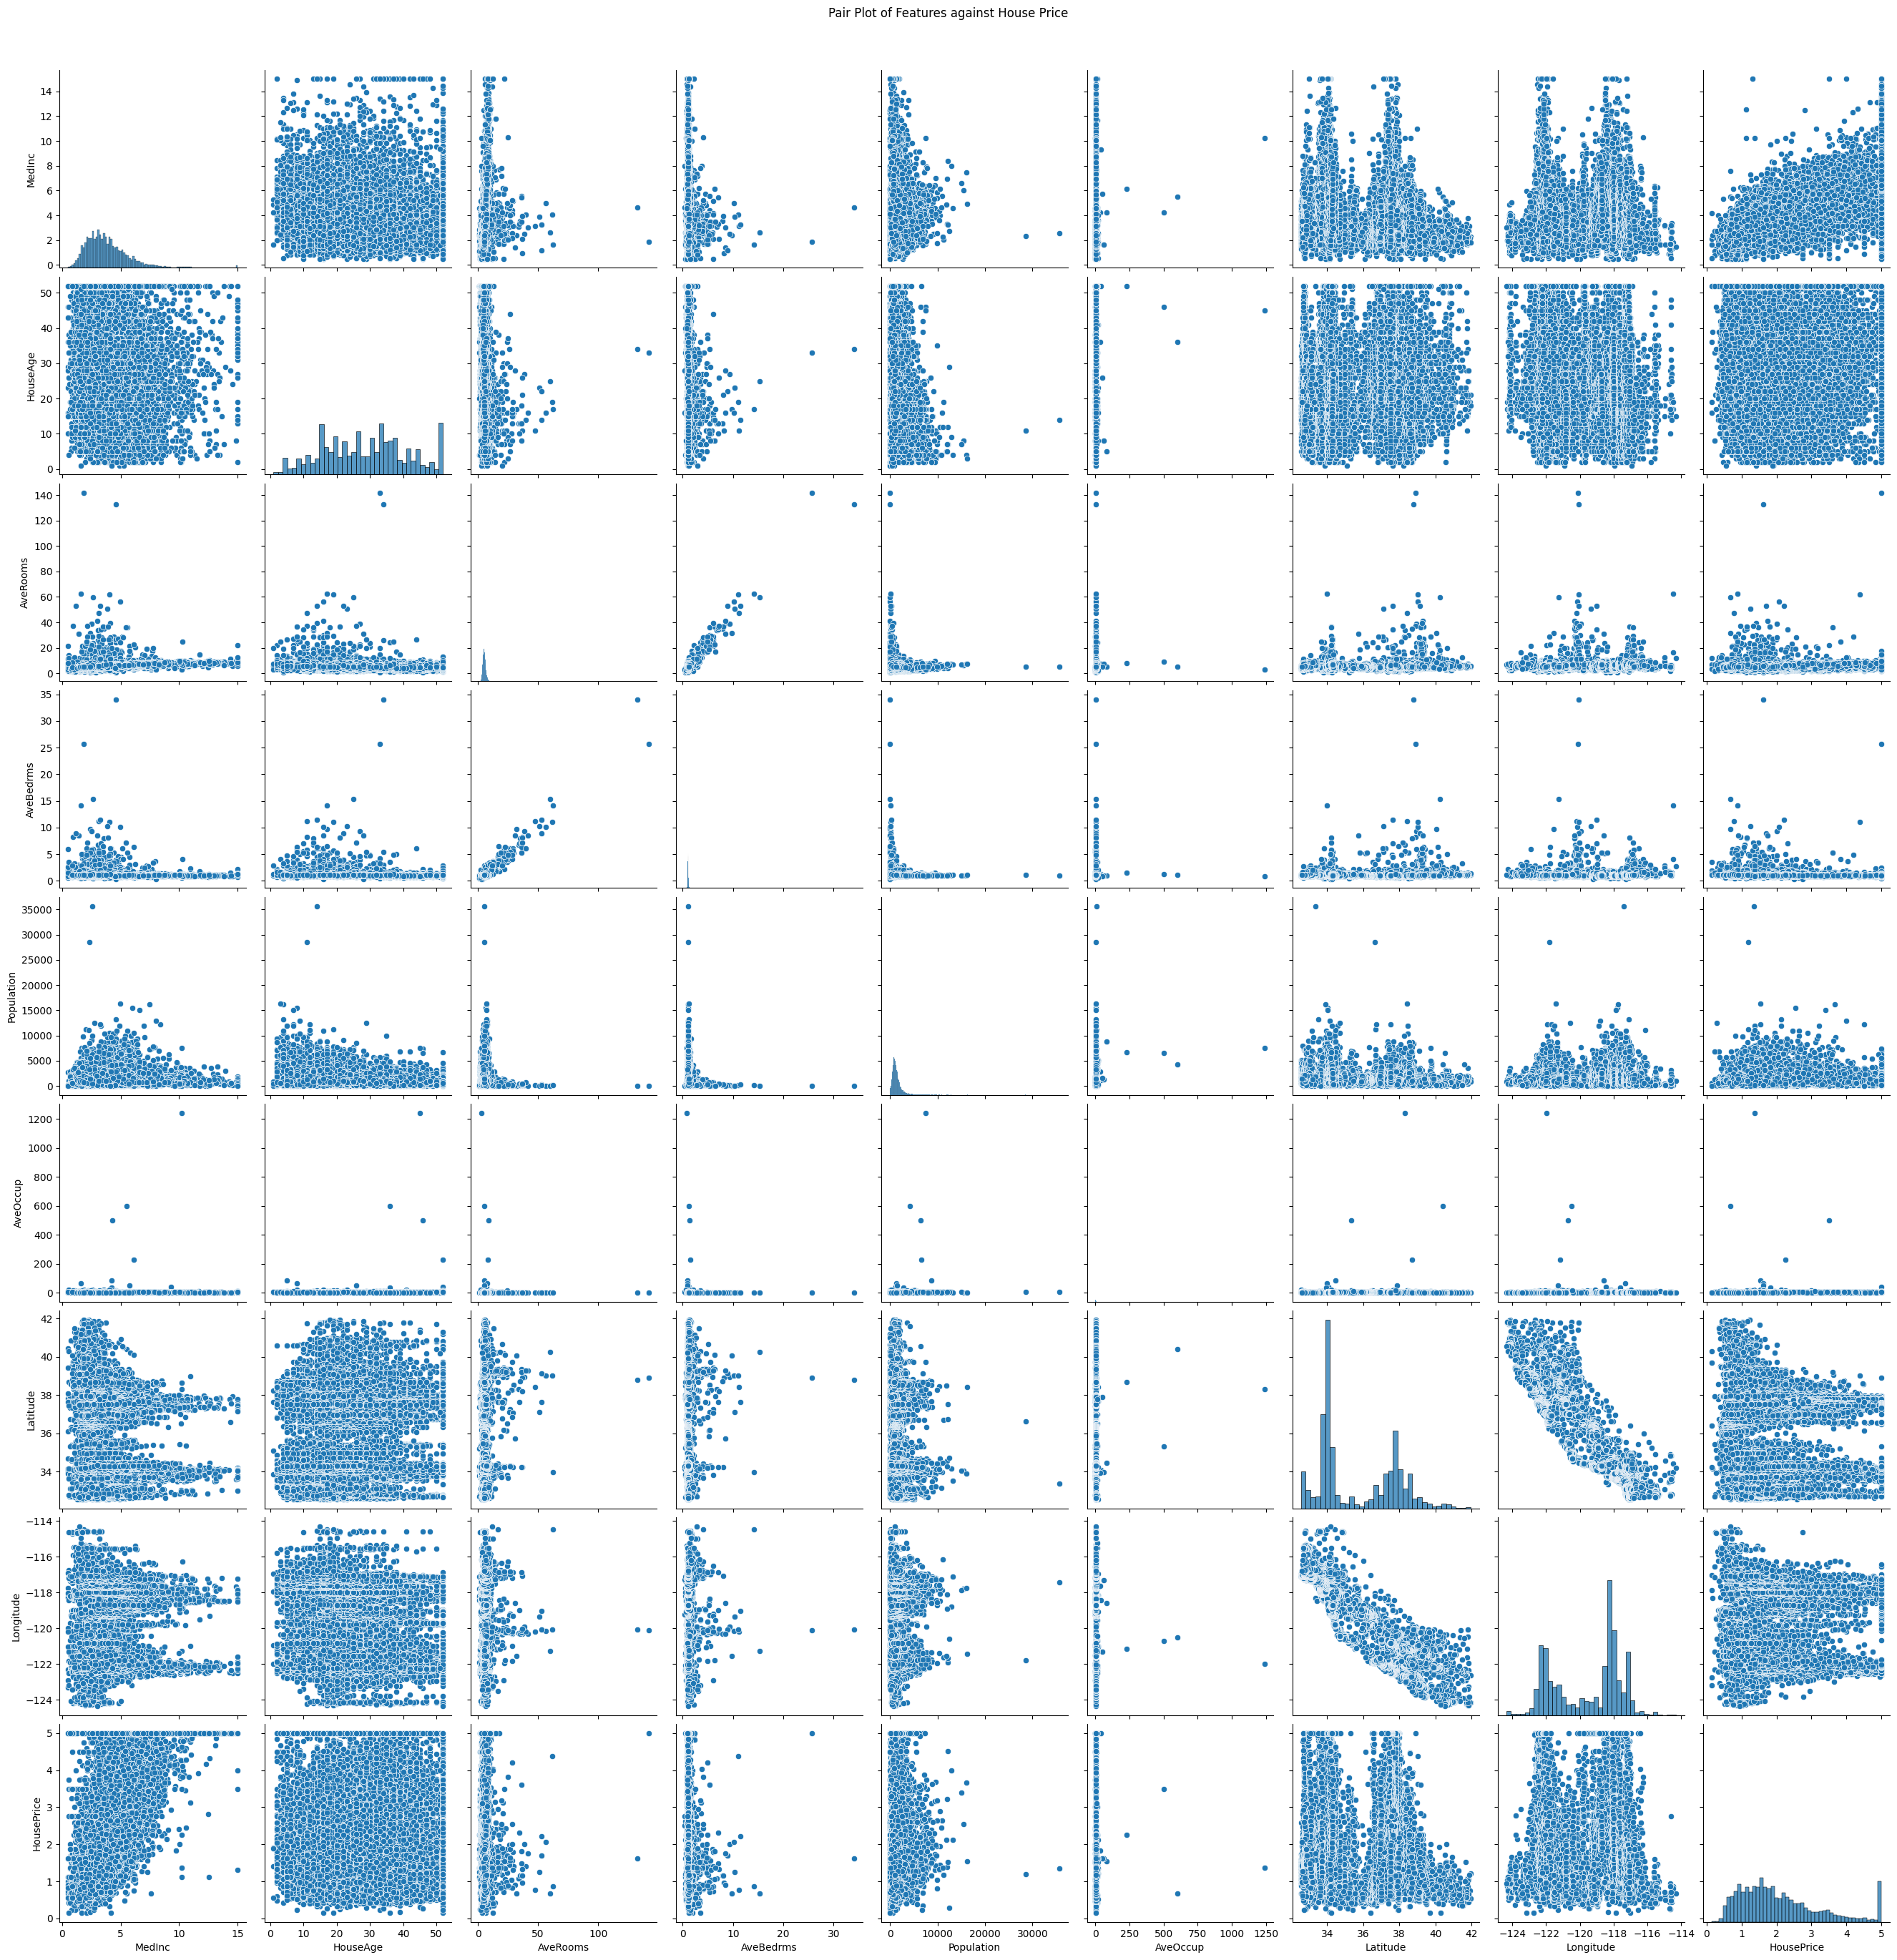

In [ ]:
sns.pairplot(housing_data, height=3)
plt.suptitle('Pair Plot of Features against House Price', y=1.02)
plt.show()

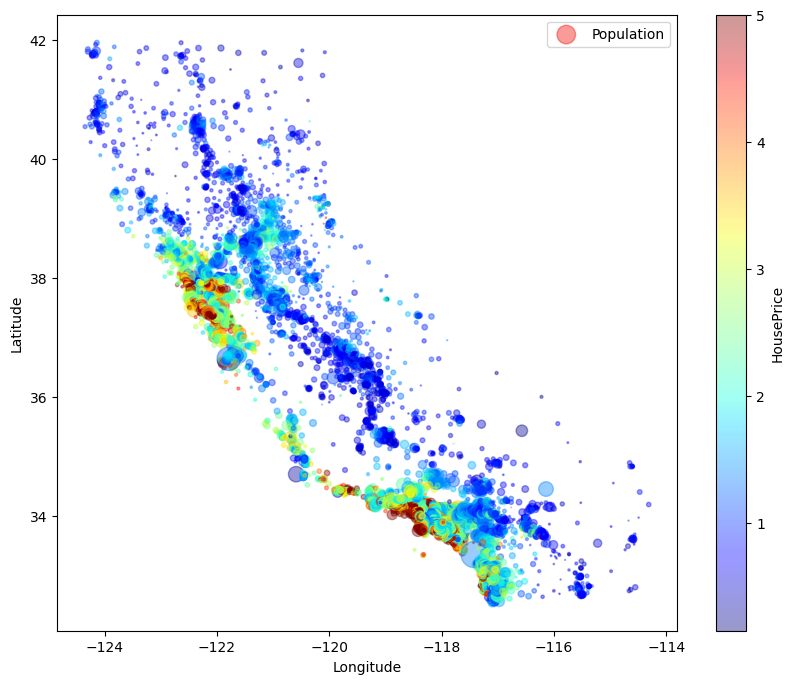

In [ ]:
housing_data.plot(
    kind = 'scatter',
    x = 'Longitude',
    y = 'Latitude',
    alpha = 0.4,
    s = housing_data['Population']/100,
    label = 'Population',
    c = 'HousePrice',
    cmap = 'jet',
    colorbar = True,
    figsize= (10,8)
)
plt.show()

<Axes: >

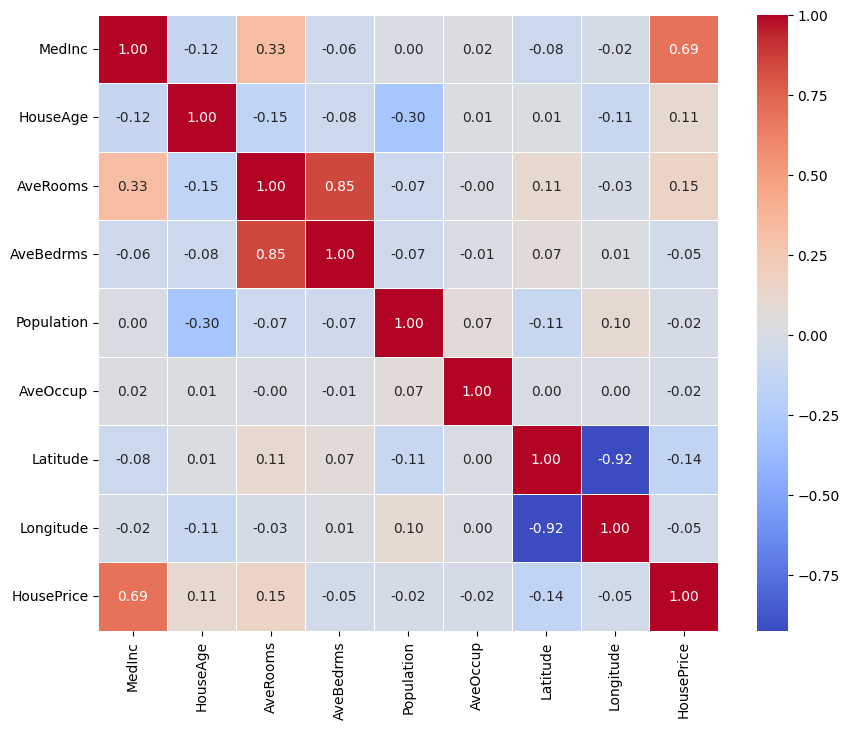

In [ ]:
corr = housing_data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)

In [ ]:
corr['HousePrice'].abs().sort_values(ascending=False)

,HousePrice
HousePrice,1.000000
MedInc,0.688075
AveRooms,0.151948
Latitude,0.144160
HouseAge,0.105623
AveBedrms,0.046701
Longitude,0.045967
Population,0.024650
AveOccup,0.023737


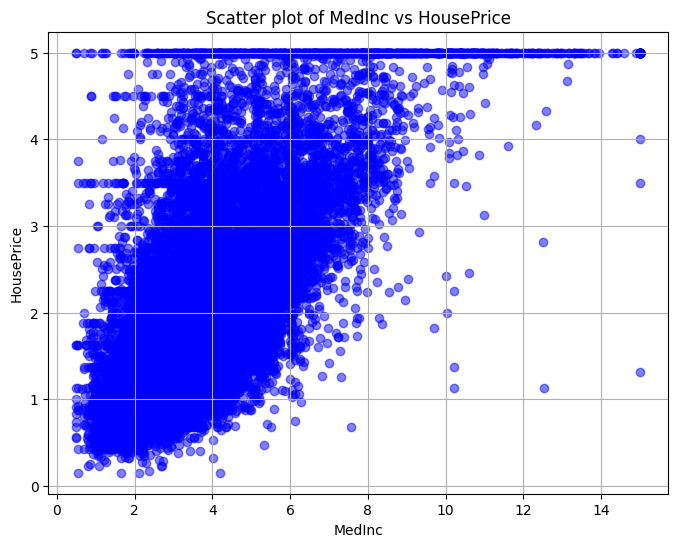

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(housing_data['MedInc'], housing_data['HousePrice'], alpha=0.5, c = 'b')
plt.title('Scatter plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid()
plt.show()